In [1]:
import warnings
import pandas as pd
import time
from utils import evaluate_model, append_comparison_table
from feature_encoding import create_preprocessor
warnings.filterwarnings("ignore", message="Could not find the number of physical cores")

data = pd.read_csv("data/preprocessed_data.csv").dropna()


## Feauture encoding

In [2]:
from sklearn.model_selection import train_test_split

target_feature = "HadHeartAttack"
train_set, test_set = train_test_split(data, test_size=0.2, stratify=data[target_feature], random_state=42)

In [3]:
X_train, y_train = train_set.drop(columns=[target_feature]), train_set[target_feature]

continuous_features = ["BMI", "SleepHours", "HeightInMeters", "WeightInKilograms"]
binning_features = ["MentalHealthDays"]
cat_features = data.select_dtypes(include=[object]).columns.to_list() # update after removing few features
ordinal_features = ["AgeCategory", "RemovedTeeth"]
onehot_features = list(set(cat_features) - set(ordinal_features) - set([target_feature]))

preprocessor = create_preprocessor(continuous_features=continuous_features, 
                                   binning_features=binning_features,
                                   ordinal_features=ordinal_features, 
                                   onehot_features=onehot_features)

X_train_encoded = preprocessor.fit_transform(X_train)
y_train_encoded = y_train.map({"Yes":1, "No":0})

In [4]:
X_train_encoded.isna().sum().sort_values()

ordinal_enc__AgeCategory                     0
onehot_enc__AlcoholDrinkers_Yes              0
onehot_enc__DifficultyDressingBathing_No     0
onehot_enc__DifficultyDressingBathing_Yes    0
onehot_enc__HighRiskLastYear_No              0
                                            ..
onehot_enc__HadAsthma_No                     0
onehot_enc__HadAsthma_Yes                    0
onehot_enc__FluVaxLast12_No                  0
num__continuous__WeightInKilograms           0
num__binned__MentalHealthDays                0
Length: 64, dtype: int64

It seems that the encoding went smoothly.

## Compare models

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

models = [
    ('Logistic Regression', LogisticRegression(max_iter=500)),
    ('Decision Tree', DecisionTreeClassifier()),
    ("KNN", KNeighborsClassifier()),
    ('SVM', SVC()),
    ('LDA', LDA()),
    ('Random Forest', RandomForestClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('XGBoost', XGBClassifier(verbosity=0)),
    ('LightGBM', LGBMClassifier(verbosity=-1)),
    ('CatBoost', CatBoostClassifier(verbose=0))
]

# For large dataset, sample data for SVM
SAMPLE_SIZE = 50000 

X_sampled, y_sampled = X_train_encoded.sample(n=SAMPLE_SIZE, random_state=42), y_train_encoded.sample(n=SAMPLE_SIZE, random_state=42)

comparison_df = None

for name, model in models:
    print(f"Beginning evaluation of {name} model.")
    start_time = time.perf_counter()
    if name == 'SVM':
        model_df = evaluate_model(model, X_sampled, y_sampled, name)
    else:
        model_df = evaluate_model(model, X_train_encoded, y_train_encoded, name)
    end_time = time.perf_counter()
    training_time = round(end_time - start_time, 2)
    model_df['Training Time (s)'] = training_time
    comparison_df = append_comparison_table(model_df, comparison_df)

Beginning evaluation of Logistic Regression model.
Beginning evaluation of Decision Tree model.
Beginning evaluation of KNN model.


d:\Ml_Projects\HeartAttackPrediction\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Ml_Projects\HeartAttackPrediction\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Beginning evaluation of SVM model.


d:\Ml_Projects\HeartAttackPrediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Ml_Projects\HeartAttackPrediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Ml_Projects\HeartAttackPrediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Beginning evaluation of LDA model.
Beginning evaluation of Random Forest model.
Beginning evaluation of AdaBoost model.


d:\Ml_Projects\HeartAttackPrediction\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Ml_Projects\HeartAttackPrediction\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Ml_Projects\HeartAttackPrediction\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Ml_Projects\HeartAttackPrediction\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the S

Beginning evaluation of XGBoost model.
Beginning evaluation of LightGBM model.
Beginning evaluation of CatBoost model.


In [7]:
comparison_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1,Train Roc_auc,Test Roc_auc,Training Time (s)
0,Logistic Regression,0.942622,0.942611,0.915042,0.914957,0.942622,0.942611,0.917433,0.917421,0.831163,0.830510,41.54
1,Decision Tree,0.999959,0.893624,0.999959,0.904141,0.999959,0.893624,0.999959,0.898738,1.000000,0.559473,54.74
2,KNN,0.946276,0.939637,0.934354,0.904775,0.946276,0.939637,0.926724,0.916608,0.945554,0.644681,1766.66
3,SVM,0.943740,0.943740,0.890645,0.890645,0.943740,0.943740,0.916424,0.916424,0.617608,0.585038,1312.26
4,LDA,0.937863,0.937794,0.913591,0.913390,0.937863,0.937794,0.921500,0.921363,0.824424,0.823767,36.91
5,Random Forest,0.999927,0.942702,0.999927,0.907744,0.999927,0.942702,0.999927,0.915642,0.999999,0.802704,656.19
6,AdaBoost,0.942232,0.942134,0.914672,0.913953,0.942232,0.942134,0.918437,0.918322,0.830372,0.828681,299.10
7,XGBoost,0.947455,0.942029,0.945258,0.911577,0.947455,0.942029,0.926516,0.917313,0.890863,0.820725,15.31
8,LightGBM,0.943706,0.942919,0.937551,0.915879,0.943706,0.942919,0.917418,0.916039,0.864284,0.830040,13.73
9,CatBoost,0.948713,0.942279,0.950057,0.909927,0.948713,0.942279,0.928650,0.916546,0.884156,0.826481,278.45


Based on the results, several conclusions can be drawn:

1. SVM and KNN performed the worst and took the most time. Of course, the strength of SVM lies in its kernel trick, which allows for very effective feature engineering, and I did not utilize this.
2. Other linear models like Logistic Regression and LDA provided quite good results, on par with advanced ensemble methods.
3. The single decision tree overfit the training data incredibly badly.
4. Almost all ensemble methods overfit the data, especially true for Random Forest and CatBoost.
5. Although linear models performed comparably to ensemble methods overall, there are reasons to believe that ensembles will work better since they overfit the data much more severely.

Since **CatBoost** showed some of the best results, with the most overfitting, I will continue to work with it.

## Data balancing


In [8]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from catboost import CatBoostClassifier

# Save only CatBoost
comparison_df = None

balancing_methods = [
    ('Positive class weights', None),
    ('Random OverSampling', RandomOverSampler(random_state=42)),
    ('SMOTE', SMOTE(random_state=42)),
    ('Random UnderSampling', RandomUnderSampler(random_state=42))
]

for method_name, sampler in balancing_methods:
    print(f"Beginning evaluation of {method_name} method.")
    start_time = time.perf_counter()

    if sampler is not None:
        pipeline = Pipeline([
            ('sampling', sampler),
            ('classifier', CatBoostClassifier(verbose=0))
        ])        
    else:
        pipeline = Pipeline([
            ('classification', CatBoostClassifier(scale_pos_weight=7, verbose=0))
        ])        
 
    model_df = evaluate_model(pipeline, X_train_encoded, y_train_encoded, method_name, n_splits=2)
    
    end_time = time.perf_counter()
    training_time = end_time - start_time
    model_df['Training Time (s)'] = training_time
    
    comparison_df = append_comparison_table(model_df, comparison_df)

Beginning evaluation of Positive class weights method.
Beginning evaluation of Random OverSampling method.
Beginning evaluation of SMOTE method.
Beginning evaluation of Random UnderSampling method.


In [9]:
comparison_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1,Train Roc_auc,Test Roc_auc,Training Time (s)
0,Positive class weights,0.908866,0.877936,0.944830,0.919636,0.908866,0.877936,0.922641,0.896061,0.920831,0.814069,103.036890
1,Random OverSampling,0.828044,0.792610,0.950493,0.925493,0.828044,0.792610,0.870422,0.843855,0.940565,0.799119,142.100565
2,SMOTE,0.952934,0.942029,0.954670,0.911353,0.952934,0.942029,0.937089,0.917331,0.911061,0.815800,185.972020
3,Random UnderSampling,0.721727,0.713021,0.940815,0.935068,0.721727,0.713021,0.796230,0.789873,0.865880,0.826021,30.906244


Well, it seems that **none of the balancing methods improved the results**; rather, they worsened them. Of course, I only tried a small portion of balancing methods. Ideally, it would be necessary to also try **ADASYN**, **KNN** variations of **SMOTE**, and others. However, this is quite computationally expensive.

In fact, these results are somewhat confusing. Previous model comparisons showed that linear models perform comparably to non-linear ones, indicating linear relationships between predictors and the target variable.

However, this does not negate the fact that real data contain quite complex, non-linear relationships, making them difficult to replicate. Thus, synthetic data only degrade the quality of the data, failing to create new realistic observations.

# Hyperparameter tuning

For tuning, I will use Bayesian optimization. **GridSearch is too slow**, considering the number of possible parameters in CatBoost; tuning could take hours or even days.

**RandomSearch** is much faster, but, ironically, it is random. Getting good results is a matter of luck.

At the same time, **Bayesian** optimization allows for hyperparameter tuning to be both fast and analytical, adjusting parameters based on their impact on model performance and gradually converging on the best solution.

In [15]:
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 500),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_float('random_strength', 0.0, 1.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'od_wait': trial.suggest_int('od_wait', 10, 50),
        'verbose': 0,
        'thread_count': -1
    }
    
    model = CatBoostClassifier(**param)
    
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    
    auc_scores = []
    
    for train_idx, valid_idx in cv.split(X_train_encoded, y_train_encoded):
        X_train, X_valid = X_train_encoded.iloc[train_idx], X_train_encoded.iloc[valid_idx]
        y_train, y_valid = y_train_encoded.iloc[train_idx], y_train_encoded.iloc[valid_idx]
        
        model.fit(X_train, y_train)
        
        y_pred_proba = model.predict_proba(X_valid)[:, 1]
        
        auc = roc_auc_score(y_valid, y_pred_proba, average='weighted', multi_class='ovr')
        
        auc_scores.append(auc)
    
    return np.mean(auc_scores)

study = optuna.create_study(direction='maximize', sampler=TPESampler())

study.optimize(objective, n_trials=15, n_jobs=1)  

[I 2024-09-24 23:00:03,870] A new study created in memory with name: no-name-240febd2-f0a4-4488-86e4-7931003c8401
[I 2024-09-24 23:01:36,489] Trial 0 finished with value: 0.825939086025123 and parameters: {'iterations': 285, 'depth': 10, 'learning_rate': 0.0010609344733598194, 'l2_leaf_reg': 2.659386739492509, 'border_count': 232, 'random_strength': 0.741445318250487, 'bagging_temperature': 0.6850358051986478, 'od_type': 'IncToDec', 'od_wait': 24}. Best is trial 0 with value: 0.825939086025123.
[I 2024-09-24 23:02:04,962] Trial 1 finished with value: 0.827433312202836 and parameters: {'iterations': 160, 'depth': 7, 'learning_rate': 0.05771120301866732, 'l2_leaf_reg': 0.002034476660525916, 'border_count': 208, 'random_strength': 0.26505141108014973, 'bagging_temperature': 0.9489853813149164, 'od_type': 'Iter', 'od_wait': 14}. Best is trial 1 with value: 0.827433312202836.
[I 2024-09-24 23:03:16,000] Trial 2 finished with value: 0.8255521357720749 and parameters: {'iterations': 294, 'dep

In [17]:
best_model_scores = evaluate_model(CatBoostClassifier(**study.best_trial.params), X_train_encoded, y_train_encoded, "best_model")
best_model_scores

0:	learn: 0.6579464	total: 267ms	remaining: 1m 55s
1:	learn: 0.6237247	total: 411ms	remaining: 1m 29s
2:	learn: 0.5931754	total: 523ms	remaining: 1m 15s
3:	learn: 0.5640943	total: 701ms	remaining: 1m 15s
4:	learn: 0.5375782	total: 767ms	remaining: 1m 5s
5:	learn: 0.5149021	total: 820ms	remaining: 58.6s
6:	learn: 0.4910979	total: 873ms	remaining: 53.4s
7:	learn: 0.4698357	total: 917ms	remaining: 48.9s
8:	learn: 0.4521544	total: 975ms	remaining: 46.2s
9:	learn: 0.4339602	total: 1.04s	remaining: 44.3s
10:	learn: 0.4178193	total: 1.09s	remaining: 42.1s
11:	learn: 0.4020203	total: 1.14s	remaining: 40.2s
12:	learn: 0.3864241	total: 1.19s	remaining: 38.7s
13:	learn: 0.3747690	total: 1.27s	remaining: 38.1s
14:	learn: 0.3631818	total: 1.31s	remaining: 36.8s
15:	learn: 0.3528537	total: 1.36s	remaining: 35.6s
16:	learn: 0.3424457	total: 1.41s	remaining: 34.6s
17:	learn: 0.3324318	total: 1.46s	remaining: 33.7s
18:	learn: 0.3242594	total: 1.5s	remaining: 32.9s
19:	learn: 0.3162350	total: 1.55s	rema

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1,Train Roc_auc,Test Roc_auc
0,best_model,0.94341,0.942957,0.93407,0.917024,0.94341,0.942957,0.916688,0.915836,0.83942,0.832531


It seems we were able to increase the AUC by 0.5 points—a decent result! Although it could have been better if I had more computational power and could have tuned for a longer time...

It is also evident that while overfitting remains, it has significantly decreased.

## Final test

Finally, it's time to test the final model on the test data, which I haven’t touched yet.

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

best_model = CatBoostClassifier(**study.best_trial.params, verbose=0)
best_model.fit(X_train_encoded, y_train_encoded)

X_test, y_test = test_set.drop(columns=[target_feature]), test_set[target_feature]
X_test_encoded = preprocessor.fit_transform(X_test)
y_test_encoded = y_test.map({"Yes":1, "No": 0})

y_pred = best_model.predict(X_test_encoded)
y_pred_proba = best_model.predict_proba(X_test_encoded)[:, 1]

metrics = {
    "accuracy": accuracy_score(y_test_encoded, y_pred),
    "precision": precision_score(y_test_encoded, y_pred, average='weighted'),
    "recall": recall_score(y_test_encoded, y_pred, average='weighted'),
    "f1": f1_score(y_test_encoded, y_pred, average='weighted'),
    "auc": roc_auc_score(y_test_encoded, y_pred_proba)
}

final_metrics_df = pd.DataFrame([metrics])

In [20]:
final_metrics_df

,accuracy,precision,recall,f1,auc
0,0.942808,0.907579,0.942808,0.915523,0.828389


Of course, while choosing the best model and tuning it, I expected an optimistic evaluation on the test data. However, it seems it was not as optimistic! The model has fairly high scores across all metrics. And this is after removing leaking variables that could have also been good predictors!

Of course, this model was trained only on half of the data, as the other half contains missing values. Additionally, the feature engineering, which turned out to be too costly for me, might also have improved accuracy.

And of course, I shouldn’t forget about applying neural networks, which is my next step!

# SHAP

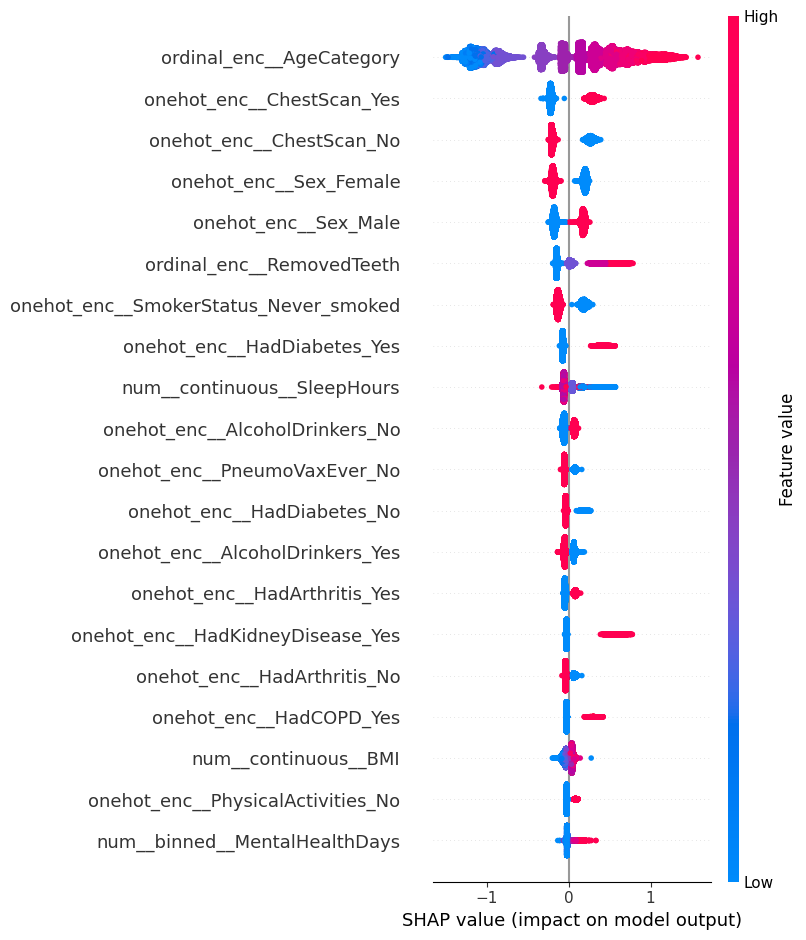

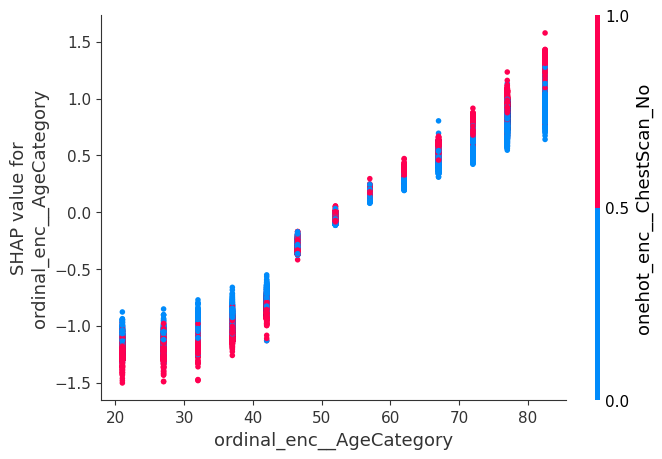

In [23]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_encoded)

shap.summary_plot(shap_values, X_test_encoded)

shap.dependence_plot(0, shap_values, X_test_encoded)

shap.force_plot(explainer.expected_value, shap_values[0, :], X_test_encoded.iloc[0, :])